## Lead Score - Case Study

#### Problem Statement

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



#### Goals of the Case Study
There are quite a few goals for this case study:

1.) Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.)There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing Numpy, Pandas, Matplotlib, Seaborn, Statsmodel, SKlearn and filter warnings.

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_Columns", 1000)

## Step 1 : Reading, understanding and Cleaning the dataset

In [423]:
Lead_df = pd.read_csv("leads.csv")

In [424]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [425]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [426]:
Lead_df.shape

(9240, 37)

In [427]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### From the stats it is visible that many columns are having lot of missing and null values. 

In [428]:
Lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [429]:
Lead_df.isnull().sum()/len(Lead_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [430]:
#### Rounding off to 2 decimal places.

round(Lead_df.isnull().sum()/len(Lead_df)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Here it is observed that below columns are having high number of missing values i.e. > 40%

1. Lead Quality.
2. Asymmetrique Activity Index.
3. Asymmetrique Profile Index.
4. Asymmetrique Activity Score.
5. Asymmetrique Profile Score.

Removing these Columns.

In [431]:
lead_df1 = Lead_df.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score' , 'Asymmetrique Profile Score'], axis=1)
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [432]:
lead_df1.shape

(9240, 32)

#### So we have dropped 5 columns with high percentage value.
Checking for missing percentage again.

In [433]:
round(lead_df1.isnull().sum()/len(lead_df1)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Here we observe that tags also have a very high percentage of missing value. Removing the same.

Removing Lead profile column as we need to identify the potential leads and it has not so many details. 

In [434]:
lead_df1 = lead_df1.drop(['Tags','Lead Profile'], axis=1)
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [435]:
round(lead_df1.isnull().sum()/len(lead_df1)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [436]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Imputing the missing value columns

In [437]:
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


#### Imputing Lead source column with "Not Available in data", since it is a source column having object data type.

In [438]:
lead_df1["Lead Source"] = lead_df1["Lead Source"].fillna('Not Available in data')

In [439]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### In "TotalVisits" column there are only 137 rows blank which is ~1.48% and not very high, so dropping these rows as we don't have count of visits.

In [440]:
lead_df1["TotalVisits"].nunique()

41

In [441]:
lead_final= lead_df1[~lead_df1["TotalVisits"].isnull()].copy()

In [442]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9103 non-null   object 
 1   Lead Number                                    9103 non-null   int64  
 2   Lead Origin                                    9103 non-null   object 
 3   Lead Source                                    9103 non-null   object 
 4   Do Not Email                                   9103 non-null   object 
 5   Do Not Call                                    9103 non-null   object 
 6   Converted                                      9103 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9103 non-null   int64  
 9   Page Views Per Visit                           9103 

In [443]:
round(lead_final.isnull().sum()/len(lead_df1)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.15
Specialization                                   15.49
How did you hear about X Education               23.81
What is your current occupation                  29.04
What matters most to you in choosing a course    29.24
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [444]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [445]:
lead_final.shape

(9103, 30)

#### Now Imputing the values for below columns.
1.) Country.

2.) Specialization.

3.) How did you hear about X Education.

4.) What is your current occupation.

5.) What matters most to you in choosing a course.

6.) City.


Since all these are obect columns and also not none of the column have a boolean (YES or NO) we impute with "Not Available in data"

In [446]:
lead_final["Country"] = lead_final["Country"] .fillna('Not Available in data')
lead_final["How did you hear about X Education"] = lead_final["How did you hear about X Education"] .fillna('Not Available in data')
lead_final["Specialization"] = lead_final["Specialization"] .fillna('Not Available in data')
lead_final["What is your current occupation"] = lead_final["What is your current occupation"] .fillna('Not Available in data')
lead_final["What matters most to you in choosing a course"] = lead_final["What matters most to you in choosing a course"] .fillna('Not Available in data')
lead_final["City"] = lead_final["City"] .fillna('Not Available in data')

In [447]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9103 non-null   object 
 1   Lead Number                                    9103 non-null   int64  
 2   Lead Origin                                    9103 non-null   object 
 3   Lead Source                                    9103 non-null   object 
 4   Do Not Email                                   9103 non-null   object 
 5   Do Not Call                                    9103 non-null   object 
 6   Converted                                      9103 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9103 non-null   int64  
 9   Page Views Per Visit                           9103 

In [448]:
round(lead_final.isnull().sum()/len(lead_df1)*100, 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

#### Now missing value columns are imputed with appropoate values

In [449]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available in data,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [450]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9103 non-null   object 
 1   Lead Number                                    9103 non-null   int64  
 2   Lead Origin                                    9103 non-null   object 
 3   Lead Source                                    9103 non-null   object 
 4   Do Not Email                                   9103 non-null   object 
 5   Do Not Call                                    9103 non-null   object 
 6   Converted                                      9103 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9103 non-null   int64  
 9   Page Views Per Visit                           9103 

In [451]:
#### Removing prospect id also as it is a unique vale for every one.

lead_final1 = lead_final.drop(['Prospect ID'], axis=1)

In [452]:
lead_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Do Not Call                                    9103 non-null   object 
 5   Converted                                      9103 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9103 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9103 

## Step 2 : Exploratory Data Analysis

#### Converted is the target variable so checking %age coversion.

In [453]:
Percentage_Converted = (sum(lead_final1['Converted'])/len(lead_final1['Converted'].index))*100
Percentage_Converted

38.02043282434362

#### So we can see that lead conversion rate is ~38%.

#### a.) Univariate  Analysis of categorical variable

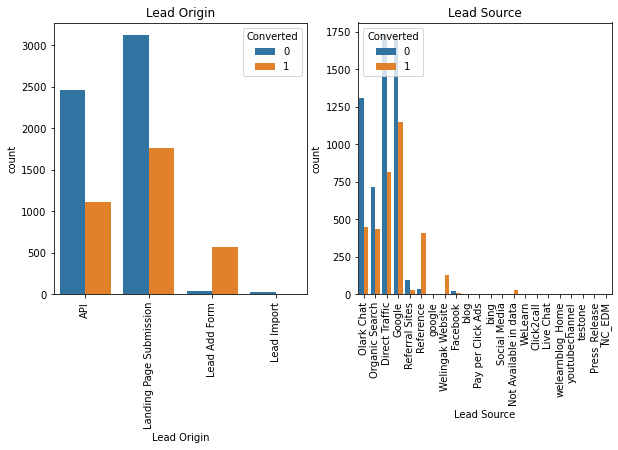

In [454]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#### Lead from API and Landing Page submission have higher conversion rate in lead Origin.
#### Olark Chat, Organic Search, Direct Traffic and Google have high rate of conversion in lead source.

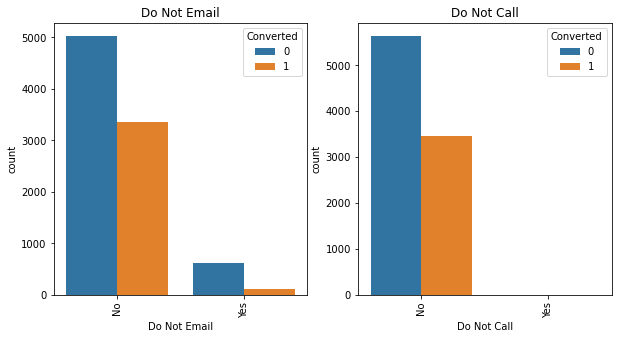

In [455]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()


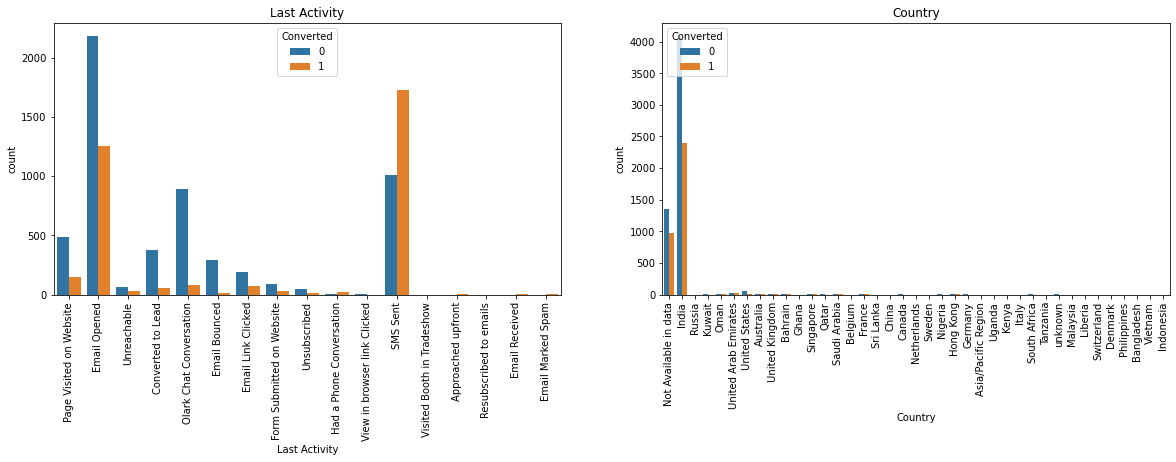

In [456]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


#### Maximum lead conversion is in INDIA as per country

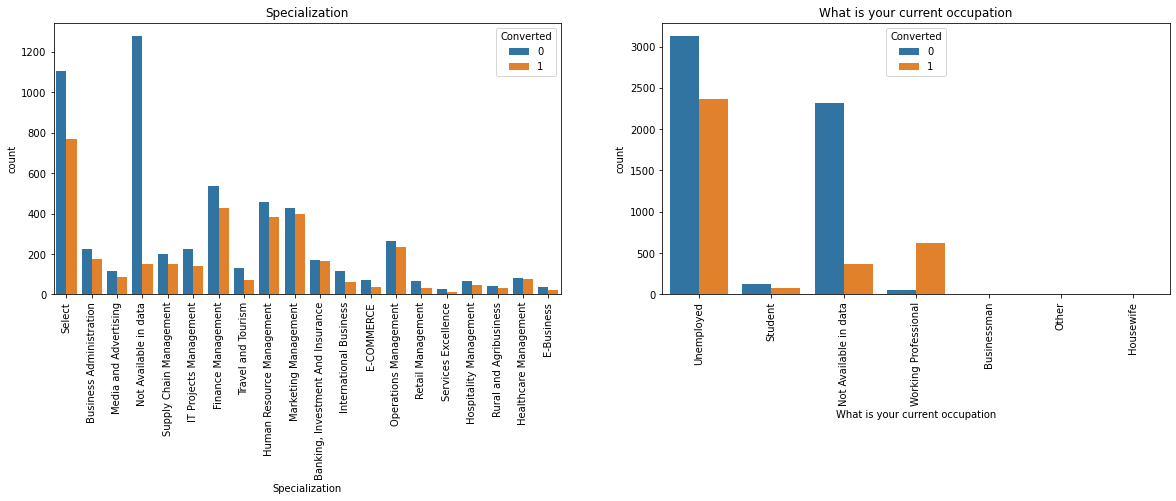

In [457]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()



#### Un-employed people opt more for the course.

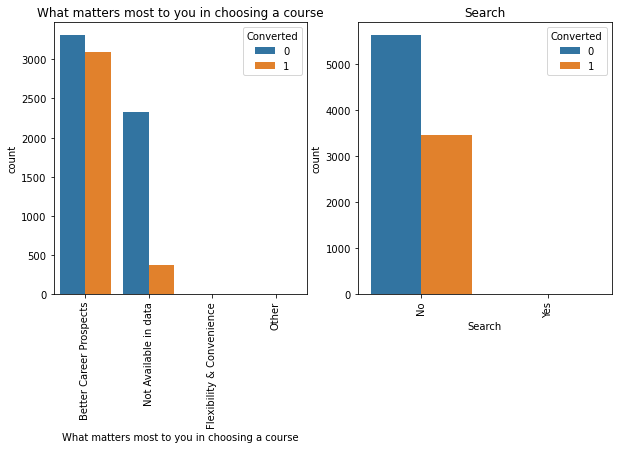

In [458]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()


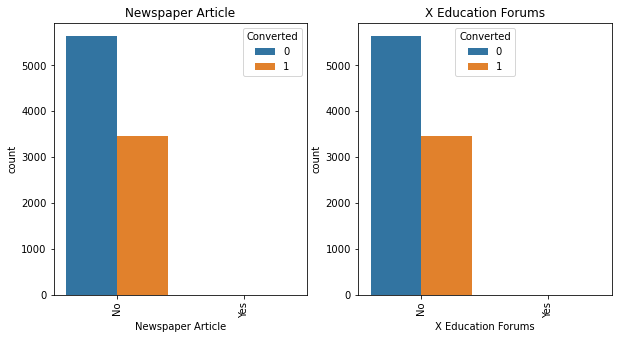

In [459]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()


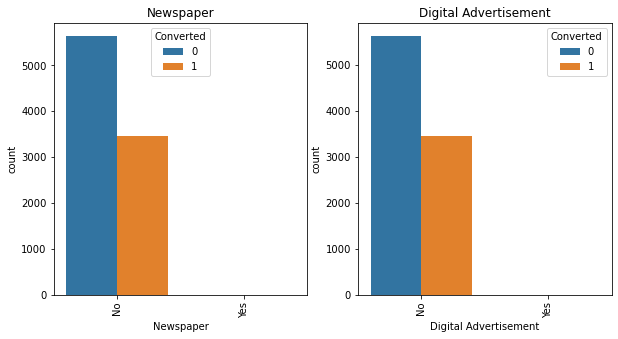

In [460]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()



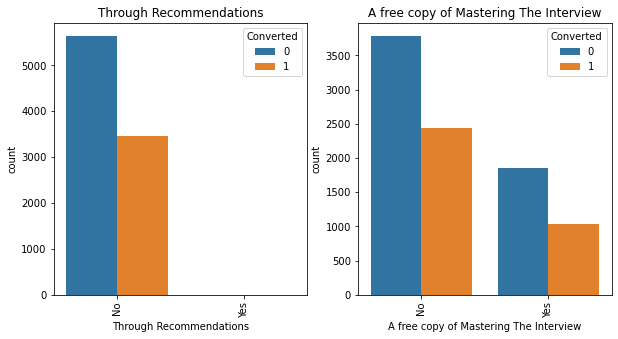

In [461]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

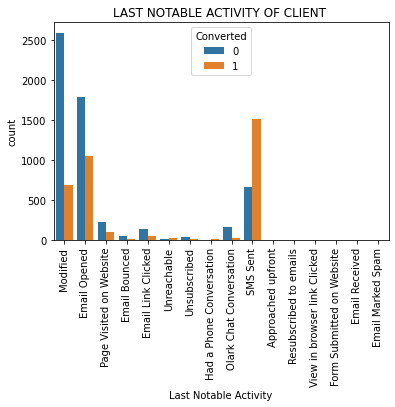

In [462]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_final1).tick_params(axis='x', rotation = 90)
plt.title('LAST NOTABLE ACTIVITY OF CLIENT ')
plt.show()

#### Inference is SMS, E-mail- and Modified conversion rate is higher than others.

In [463]:
lead_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Do Not Call                                    9103 non-null   object 
 5   Converted                                      9103 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9103 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9103 

#### b.) Numerical data

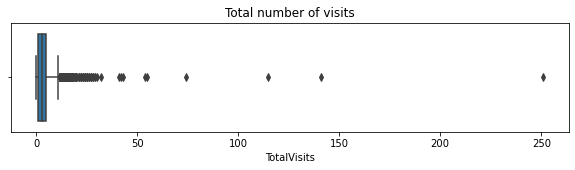

In [464]:
plt.figure(figsize=[10,2])
sns.boxplot(lead_final1["TotalVisits"])
plt.title("Total number of visits")
plt.show()

#### We see that there are few outliers in the data, so dealing with the outlier.

In [465]:
lead_final1["TotalVisits"].quantile([0.0,0.5, 0.7, 0.9, 0.95, 0.99])

0.00     0.0
0.50     3.0
0.70     4.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

#### Checking for inter Quartile range.
#### IQR = Quartile3 - Quartile1

In [466]:
Q1 = np.percentile(lead_final1["TotalVisits"],25,interpolation = 'midpoint')
Q3 = np.percentile(lead_final1["TotalVisits"],75,interpolation = 'midpoint')

IQR = Q3-Q1
IQR
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(upper_bound)
print(lower_bound)

11.0
-5.0


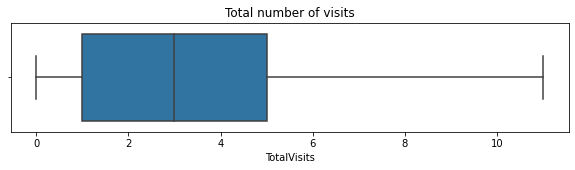

In [467]:
lead_final1.loc[lead_final1["TotalVisits"]>upper_bound,"TotalVisits"]= upper_bound
lead_final1.loc[lead_final1["TotalVisits"]<lower_bound,"TotalVisits"]= lower_bound
plt.figure(figsize=[10,2])
sns.boxplot(lead_final1["TotalVisits"])
plt.title("Total number of visits")
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

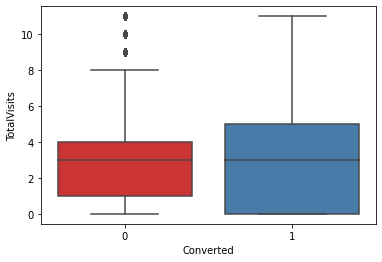

In [468]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_final1,palette='Set1')

#### we can observe from above graph that median of converted and non converted leads are almost at same values so conclusion based on total visit can't be done

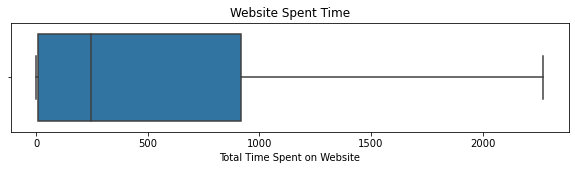

In [469]:
plt.figure(figsize=[10,2])
sns.boxplot(lead_final1["Total Time Spent on Website"])
plt.title("Website Spent Time")
plt.show()

#### No major outlier observed in Total time spent on website.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

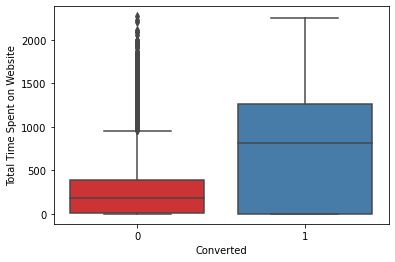

In [470]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_final1,palette='Set1')

#### Here we can observe that person spending more time on website are likely to be converted.

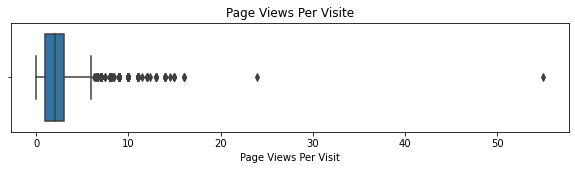

In [471]:
plt.figure(figsize=[10,2])
sns.boxplot(lead_final1["Page Views Per Visit"])
plt.title("Page Views Per Visite")
plt.show()

#### We see that there are few outliers in the data, so dealing with the outlier.

In [472]:
lead_final1["Page Views Per Visit"].quantile([0.0,0.5, 0.7, 0.9, 0.95, 0.99])

0.00    0.0
0.50    2.0
0.70    3.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

#### Checking for inter Quartile range.

In [473]:
Q1_P = np.percentile(lead_final1["Page Views Per Visit"],25,interpolation = 'midpoint')
Q3_P = np.percentile(lead_final1["Page Views Per Visit"],75,interpolation = 'midpoint')

IQR_P = Q3_P-Q1_P
IQR_P
upper_bound_P = Q3_P+1.5*IQR_P
lower_bound_P = Q1_P-1.5*IQR_P
print(upper_bound)
print(lower_bound)

11.0
-5.0


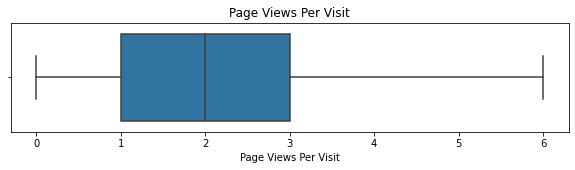

In [474]:
lead_final1.loc[lead_final1["Page Views Per Visit"]>upper_bound_P,"Page Views Per Visit"]= upper_bound_P
lead_final1.loc[lead_final1["Page Views Per Visit"]<lower_bound_P,"Page Views Per Visit"]= lower_bound_P
plt.figure(figsize=[10,2])
sns.boxplot(lead_final1["Page Views Per Visit"])
plt.title("Page Views Per Visit")
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

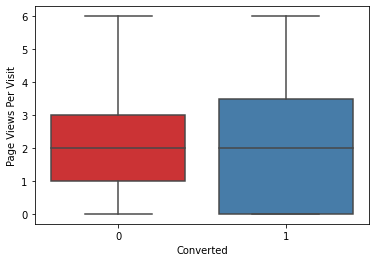

In [475]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_final1,palette='Set1')

#### Here we can observe from above graph that median of converted and non converted leads are almost at same values so conclusion based on total visit can't be done.

## Step 3 : Creating Dummy Variables.

In [476]:
lead_dummy = pd.get_dummies(lead_final1[['Lead Origin','Lead Source', 'Do Not Email', 'Last Activity', 'Specialization' , 'What is your current occupation','Last Notable Activity', 'A free copy of Mastering The Interview']], drop_first=True)

In [477]:
lead_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Available in data,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available in data,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Available in data,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Adding dummy variable output to main data sheet. 

In [478]:
lead_final1_dummy = pd.concat([lead_final1, lead_dummy], axis=1)
lead_final1_dummy.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Available in data,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available in data,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Available in data,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available in data,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [479]:
lead_final1_dummy = lead_final1_dummy.drop(['Lead Number','City','Magazine','Get updates on DM Content','I agree to pay the amount through cheque','Update me on Supply Chain Content','Receive More Updates About Our Courses','How did you hear about X Education','How did you hear about X Education','What is your current occupation_Not Available in data','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_Not Available in data','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
lead_final1_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Available in data,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Step 4 : Train-Test Split

In [480]:
X = lead_final1_dummy .drop(['Converted'], 1)

In [481]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Available in data,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [482]:
y = lead_final1_dummy ['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### So now target variable is in y.

#### Splitting dataset into Train(70%) and Test(30%).

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [484]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Available in data,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
5414,0.181818,0.669454,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1411,0.363636,0.555018,0.666667,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2137,0.363636,0.029049,0.221667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
97,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4949,0.545455,0.569982,0.500000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


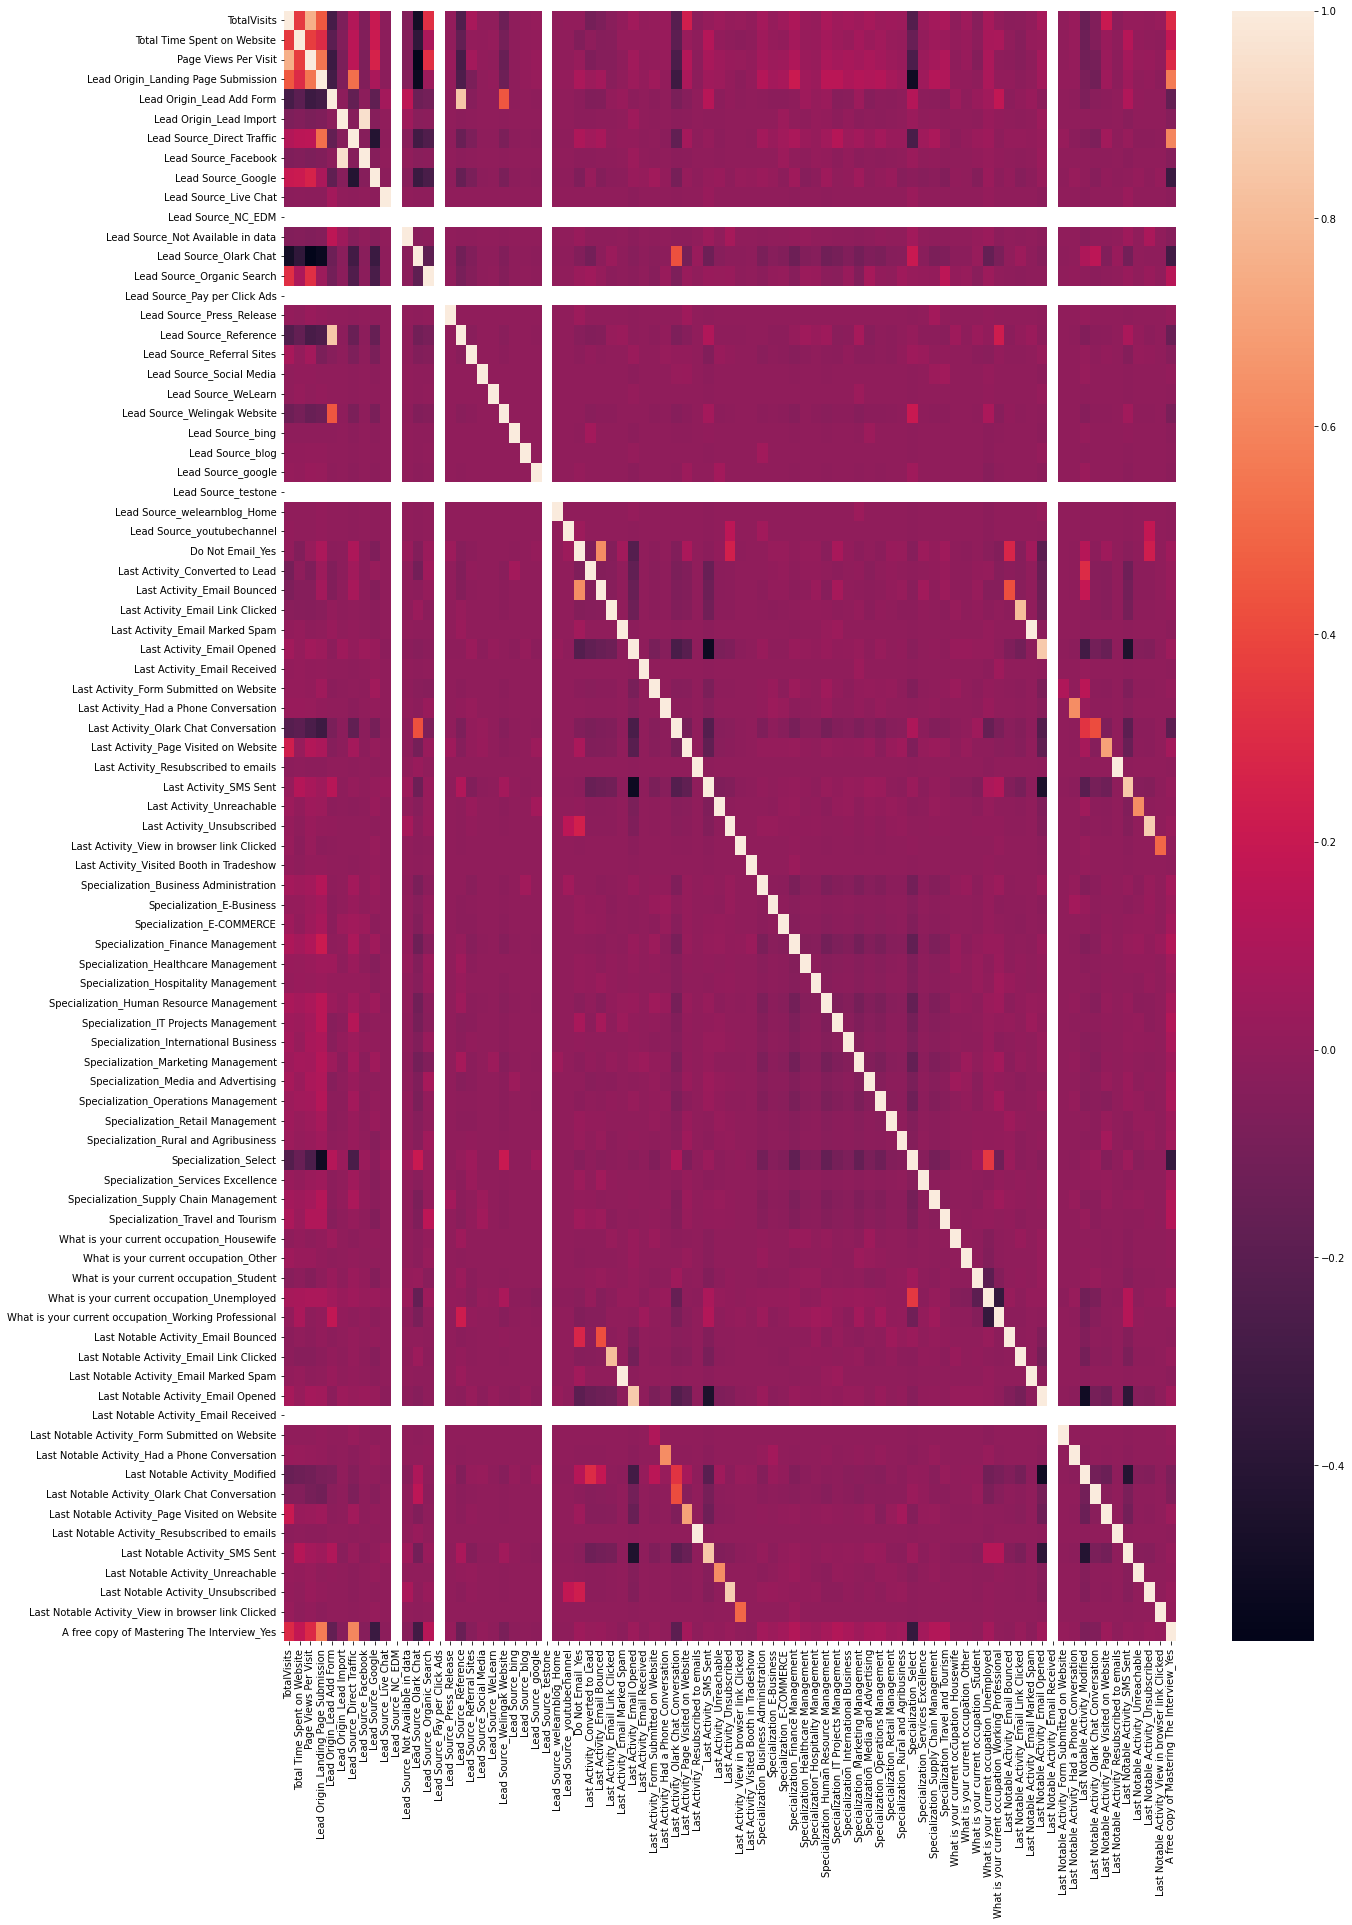

In [485]:
#### Checking correlation between the variables.

plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

#### As there are lot of variables we try this with RFE.

## Step 5: Buliding A Model

In [486]:
logreg = LogisticRegression()

In [487]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [488]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 67),
 ('Lead Source_Not Available in data', False, 47),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 69),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 23),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 48),
 ('Lead Source_blog', False, 45),
 ('Lead Source_google', False, 33),
 ('Lead Source_testone', False, 66

#### Above are the slected features for RFE.

In [489]:
col = X_train.columns[rfe.support_]

#### Putting in variable column

In [490]:
#### Checking for p-Vale and VIF's

In [491]:
X_train = X_train[col]

In [492]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.8
Date:                Mon, 06 Feb 2023   Deviance:                       5449.5
Time:                        23:06:13   Pearson chi2:                 6.23e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8348      0.090    -31.335      0.000      -3.012      -2.657
Total Time Spent on Website                              3.8859      0.145     26.804      0.000       3.602       4.170
Lead Origin_Lead Add Form                                3.2276      0.220     14.666      0.000       2.796       3.659
Lead Source_Direct Traffic                              -0.4976      0.077     -6.491      0.000      -0.648      -0.347
Lead Source_Welingak Website                             2.4711      1.032      2.394      0.017       0.448       4.494
Do Not Email_Yes                                        -1.4985      0.172     -8.726      0.000      -1.835      -1.162
Last Activity_SMS Sent                                   1.3374      0.072     18.569      0.000       1.196       1.479
Last Activity_Unsubscribed                               1.5392      0.448      3.436      0.001       0.661       2.417
What is your current occupation_Housewife               24.7616   2.37e+04      0.001      0.999   -4.65e+04    4.65e+04
What is your current occupation_Other                    2.4450      0.739      3.308      0.001       0.996       3.894
What is your current occupation_Student                  1.2923      0.226      5.730      0.000       0.850       1.734
What is your current occupation_Unemployed               1.1788      0.085     13.887      0.000       1.012       1.345
What is your current occupation_Working Professional     3.6995      0.200     18.538      0.000       3.308       4.091
Last Notable Activity_Had a Phone Conversation          23.9681   2.87e+04      0.001      0.999   -5.62e+04    5.63e+04
Last Notable Activity_Olark Chat Conversation           -0.8149      0.345     -2.362      0.018      -1.491      -0.139
Last Notable Activity_Unreachable                        1.8645      0.534      3.492      0.000       0.818       2.911
========================================================================================================================
"""

In [493]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.01
0,Total Time Spent on Website,1.85
1,Lead Origin_Lead Add Form,1.54
5,Last Activity_SMS Sent,1.51
2,Lead Source_Direct Traffic,1.42
3,Lead Source_Welingak Website,1.29
11,What is your current occupation_Working Profes...,1.28
4,Do Not Email_Yes,1.15
6,Last Activity_Unsubscribed,1.07
9,What is your current occupation_Student,1.04


#### VIF is < 5 and seems fine in P-Value removing "Last Notable Activity_Had a Phone Conversation"

In [494]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [495]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.2
Date:                Mon, 06 Feb 2023   Deviance:                       5460.4
Time:                        23:06:13   Pearson chi2:                 6.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8315      0.090    -31.325      0.000      -3.009      -2.654
Total Time Spent on Website                              3.8869      0.145     26.840      0.000       3.603       4.171
Lead Origin_Lead Add Form                                3.2216      0.220     14.642      0.000       2.790       3.653
Lead Source_Direct Traffic                              -0.5030      0.077     -6.565      0.000      -0.653      -0.353
Lead Source_Welingak Website                             2.4710      1.032      2.394      0.017       0.448       4.494
Do Not Email_Yes                                        -1.5006      0.172     -8.741      0.000      -1.837      -1.164
Last Activity_SMS Sent                                   1.3318      0.072     18.502      0.000       1.191       1.473
Last Activity_Unsubscribed                               1.5350      0.448      3.426      0.001       0.657       2.413
What is your current occupation_Housewife               23.7595   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
What is your current occupation_Other                    2.4438      0.739      3.306      0.001       0.995       3.893
What is your current occupation_Student                  1.2923      0.225      5.732      0.000       0.850       1.734
What is your current occupation_Unemployed               1.1842      0.085     13.958      0.000       1.018       1.351
What is your current occupation_Working Professional     3.6996      0.200     18.540      0.000       3.308       4.091
Last Notable Activity_Olark Chat Conversation           -0.8209      0.345     -2.380      0.017      -1.497      -0.145
Last Notable Activity_Unreachable                        1.8592      0.534      3.481      0.000       0.812       2.906
========================================================================================================================
"""

#### Again checking VIF's

In [496]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.01
0,Total Time Spent on Website,1.84
1,Lead Origin_Lead Add Form,1.54
5,Last Activity_SMS Sent,1.51
2,Lead Source_Direct Traffic,1.41
3,Lead Source_Welingak Website,1.29
11,What is your current occupation_Working Profes...,1.28
4,Do Not Email_Yes,1.15
6,Last Activity_Unsubscribed,1.07
9,What is your current occupation_Student,1.04


#### Removing "What is your current occupation_Housewife" as having high P-Value.

In [497]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [498]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.6
Date:                Mon, 06 Feb 2023   Deviance:                       5483.3
Time:                        23:06:13   Pearson chi2:                 6.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7971      0.089    -31.327      0.000      -2.972      -2.622
Total Time Spent on Website                              3.8924      0.145     26.931      0.000       3.609       4.176
Lead Origin_Lead Add Form                                3.2760      0.220     14.872      0.000       2.844       3.708
Lead Source_Direct Traffic                              -0.5035      0.076     -6.584      0.000      -0.653      -0.354
Lead Source_Welingak Website                             2.4205      1.032      2.345      0.019       0.397       4.444
Do Not Email_Yes                                        -1.5070      0.172     -8.776      0.000      -1.844      -1.170
Last Activity_SMS Sent                                   1.3212      0.072     18.386      0.000       1.180       1.462
Last Activity_Unsubscribed                               1.5297      0.448      3.413      0.001       0.651       2.408
What is your current occupation_Other                    2.4078      0.739      3.257      0.001       0.959       3.857
What is your current occupation_Student                  1.2552      0.225      5.570      0.000       0.814       1.697
What is your current occupation_Unemployed               1.1513      0.084     13.716      0.000       0.987       1.316
What is your current occupation_Working Professional     3.6658      0.199     18.407      0.000       3.275       4.056
Last Notable Activity_Olark Chat Conversation           -0.8341      0.345     -2.420      0.016      -1.510      -0.159
Last Notable Activity_Unreachable                        1.8430      0.533      3.455      0.001       0.797       2.889
========================================================================================================================
"""

In [499]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.01
0,Total Time Spent on Website,1.84
1,Lead Origin_Lead Add Form,1.54
5,Last Activity_SMS Sent,1.51
2,Lead Source_Direct Traffic,1.41
3,Lead Source_Welingak Website,1.29
10,What is your current occupation_Working Profes...,1.28
4,Do Not Email_Yes,1.15
6,Last Activity_Unsubscribed,1.07
8,What is your current occupation_Student,1.04


## Step 6 : Creating prediction

In [500]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5414    0.855400
1411    0.625857
2137    0.115442
97      0.161670
4949    0.869205
2447    0.321971
3529    0.181138
4064    0.057479
7208    0.836192
3436    0.397117
dtype: float64

In [501]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85539954, 0.62585739, 0.11544211, 0.16166976, 0.86920468,
       0.32197103, 0.18113836, 0.05747898, 0.83619227, 0.3971166 ])

In [502]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.855400
1,1,0.625857
2,0,0.115442
3,0,0.161670
4,1,0.869205


In [503]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.855400,1
1,1,0.625857,1
2,0,0.115442,0
3,0,0.161670,0
4,1,0.869205,1


## Step 7 : Evaluation

In [504]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3424,  477],
       [ 821, 1650]], dtype=int64)

#### Confusion matrix

In [505]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7962962962962963

#### Over all accuray is aroung 80% which seems to be a good accuracy.

#### Substituting the value of true positive


In [506]:
TP = confusion[1,1]

#### Substituting the value of true negatives


In [507]:
TN = confusion[0,0]

#### Substituting the value of false positives


In [508]:
FP = confusion[0,1] 

#### Substituting the value of false negatives

In [509]:
FN = confusion[1,0]

#### Sensitivity

In [510]:
TP/(TP+FN)

0.6677458518818292

#### Calculating the specificity

In [511]:
TN/(TN+FP)

0.8777236605998462

## Finding the Optimal Cutoff

In [512]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [513]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

#### Calling ROC function

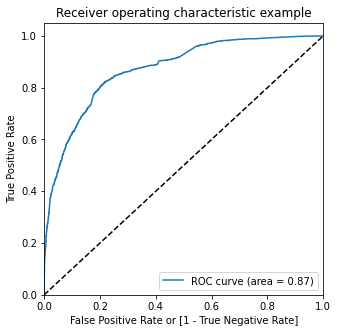

In [514]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### So area under ROC curve is 0.87 which is good and model seems to be a good model.

In [515]:
# Create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.855400,1,1,1,1,1,1,1,1,1,1,0
1,1,0.625857,1,1,1,1,1,1,1,1,0,0,0
2,0,0.115442,0,1,1,0,0,0,0,0,0,0,0
3,0,0.161670,0,1,1,0,0,0,0,0,0,0,0
4,1,0.869205,1,1,1,1,1,1,1,1,1,1,0


In [516]:
# Create DF to check the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.387790  1.000000  0.000000
0.1   0.1  0.589768  0.983003  0.340682
0.2   0.2  0.727087  0.884662  0.627275
0.3   0.3  0.788920  0.836908  0.758523
0.4   0.4  0.803202  0.783893  0.815432
0.5   0.5  0.796296  0.667746  0.877724
0.6   0.6  0.789234  0.580737  0.921302
0.7   0.7  0.771186  0.495751  0.945655
0.8   0.8  0.752197  0.407123  0.970777
0.9   0.9  0.703547  0.250506  0.990515


#### Visualise via plotting it

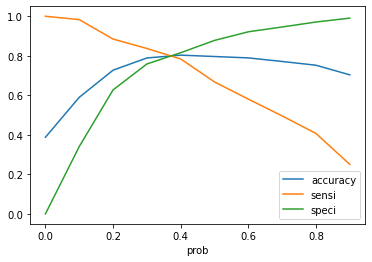

In [517]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Optimal cut-off is at 0.4.

In [518]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.855400,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.625857,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.115442,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.161670,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.869205,1,1,1,1,1,1,1,1,1,1,0,1


In [519]:
# Checking for overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.803201506591337

In [520]:
# Checking confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3181,  720],
       [ 534, 1937]], dtype=int64)

In [521]:
TP = confusion2[1,1]  ## true positive

TN = confusion2[0,0] ## true negatives

FP = confusion2[0,1] ## false positives

FN = confusion2[1,0] ## false negatives

In [522]:
# Calculating sensitivity
TP/(TP+FN)

0.783893160663699

In [523]:
# Calculating specificity
TN/(TN+FP)

0.8154319405280698

## Step 8 : Test set prediction

In [524]:
# Scale the test set as well using just 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Available in data,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,A free copy of Mastering The Interview_Yes
5643,0.090909,0.026408,0.166667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7718,0.545455,0.140845,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4666,0.272727,0.089789,0.250000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3476,0.545455,0.095511,0.500000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4881,0.363636,0.401849,0.666667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [525]:
# Substituting all the columns in the final train model
col = X_train.columns

In [526]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
5643,1.0,0.026408,0,1,0,1,0,0,0,0,1,0,0,0
7718,1.0,0.140845,0,0,0,0,0,0,0,0,1,0,0,0
4666,1.0,0.089789,0,0,0,0,0,0,0,0,0,0,0,0
3476,1.0,0.095511,0,0,0,0,0,0,0,0,0,0,0,0
4881,1.0,0.401849,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1.0,0.261884,0,0,0,0,0,0,0,0,1,0,0,0
8589,1.0,0.190141,0,1,0,0,0,0,0,0,0,0,0,0
54,1.0,0.042254,0,0,0,0,0,0,0,0,0,0,0,0
7376,1.0,0.192782,0,1,0,0,0,0,0,0,1,0,0,0


In [527]:
# Storing prediction of test set in 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Removing index for both dataframes 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Column Renaming. 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.027826
1,0,0.250184
2,0,0.079611
3,0,0.081258
4,1,0.381931


#### Taking out prediction with cutoff valu 0.35

In [528]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.027826,0
1,0,0.250184,0
2,0,0.079611,0
3,0,0.081258,0
4,1,0.381931,1
...,...,...,...
2726,1,0.348304,0
2727,0,0.071720,0
2728,0,0.067065,0
2729,0,0.197973,0


In [529]:
# Overall Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8125228853899671

In [530]:
# confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1417,  324],
       [ 188,  802]], dtype=int64)

In [531]:
TP = confusion2[1,1]  ## true positive

TN = confusion2[0,0] ## true negatives

FP = confusion2[0,1] ## false positives

FN = confusion2[1,0] ## false negatives

In [532]:
# sensitivity
TP/(TP+FN)

0.8101010101010101

In [533]:
# specificity
TN/(TN+FP)

0.8139000574382539

## Step 9: Precision-Recall View

In [534]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6367    0
 6368    0
 6369    0
 6370    0
 6371    1
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6367    0
 6368    0
 6369    0
 6370    0
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [535]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

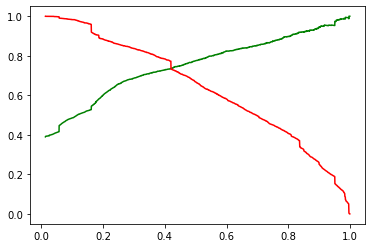

In [536]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [537]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.855400,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.625857,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.115442,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.161670,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.869205,1,1,1,1,1,1,1,1,1,1,0,1


In [538]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.794256120527307

In [539]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3249,  652],
       [ 659, 1812]], dtype=int64)

In [540]:

TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [541]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7353896103896104

In [542]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7333063537029543

## Step 10 : Prediction on test set

In [543]:
# Storing prediction of test data set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.027826
1,0,0.250184
2,0,0.079611
3,0,0.081258
4,1,0.381931


In [544]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.027826,0
1,0,0.250184,0
2,0,0.079611,0
3,0,0.081258,0
4,1,0.381931,0
...,...,...,...
2726,1,0.348304,0
2727,0,0.071720,0
2728,0,0.067065,0
2729,0,0.197973,0


In [545]:
# overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8033687294031491

In [546]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1479,  262],
       [ 275,  715]], dtype=int64)

In [547]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [548]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7318321392016377

In [549]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7222222222222222

#### Below features impacted the potential buyers most which were converted:

    The total time spend on the Website.
    Total number of visits.
    When the lead source was:
    a. Google
    b. Direct traffic
    c. Olark chat
    d. Organic search
    When the last activity was:
    a. SMS
    b. E-Mail opened
    When the lead origin is Landing page submission.
    When their current occupation is as umemployed & working professional.
    
